# Import thư viện

In [72]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Phần 1: Tiền xử lí dữ liệu (đổi ảnh từ jpg sang png)

In [67]:
def convert_images(input_folder, output_folder):
    os.makedirs(output_folder, exist_ok=True)  # Tạo thư mục đích nếu chưa tồn tại
    for category in os.listdir(input_folder):  # Lặp qua từng thư mục con (nhãn)
        category_path = os.path.join(input_folder, category)
        save_path = os.path.join(output_folder, category)
        os.makedirs(save_path, exist_ok=True)
        
        for img_name in os.listdir(category_path):  # Lặp qua từng ảnh trong thư mục
            img_path = os.path.join(category_path, img_name)
            img = cv2.imread(img_path)  # Đọc ảnh
            if img is not None:
                new_name = os.path.splitext(img_name)[0] + '.png'  # Đổi đuôi sang .png
                cv2.imwrite(os.path.join(save_path, new_name), img)  # Lưu ảnh mới

# Chuyển đổi ảnh train và test
convert_images('C:/Users/ADMIN/OneDrive/Desktop/Deep-Learning/Train', 'C:/Users/ADMIN/OneDrive/Desktop/Deep-Learning/Train_png')
convert_images('C:/Users/ADMIN/OneDrive/Desktop/Deep-Learning/Test', 'C:/Users/ADMIN/OneDrive/Desktop/Deep-Learning/Test_png')


# Phần 2: Cấu hình

In [68]:
batch_size = 32  # Số lượng ảnh mỗi batch
img_height = 100  # Chiều cao ảnh đầu vào
img_width = 100  # Chiều rộng ảnh đầu vào

# Phần 3: Định nghĩa đường dẫn tập dữ liệu

In [69]:
train_dir =r"C:\Users\ADMIN\OneDrive\Desktop\Deep-Learning\Train_png"
test_dir =r"C:\Users\ADMIN\OneDrive\Desktop\Deep-Learning\Test_png"

# Phần 4: Chuẩn bị dữ liệu

In [70]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 9326 images belonging to 21 classes.
Found 2325 images belonging to 21 classes.


# Phần 5: Xây dựng mô hình CNN

In [74]:
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.3),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.4),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

# Compile mô hình
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Thêm các callback giúp ổn định quá trình huấn luyện
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

# Huấn luyện mô hình
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 184s 625ms/step - accuracy: 0.4057 - loss: 2.8050 - val_accuracy: 0.0675 - val_loss: 23.5403 - learning_rate: 0.0010
Epoch 2/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 100s 341ms/step - accuracy: 0.7505 - loss: 0.8223 - val_accuracy: 0.6060 - val_loss: 2.9968 - learning_rate: 0.0010
Epoch 3/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 104s 358ms/step - accuracy: 0.8263 - loss: 0.5778 - val_accuracy: 0.8787 - val_loss: 0.5221 - learning_rate: 0.0010
Epoch 4/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 97s 331ms/step - accuracy: 0.8750 - loss: 0.4163 - val_accuracy: 0.8860 - val_loss: 0.4526 - learning_rate: 0.0010
Epoch 5/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 96s 329ms/step - accuracy: 0.9070 - loss: 0.3412 - val_accuracy: 0.8632 - val_loss: 0.9159 - learning_rate: 0.0010
Epoch 6/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 97s 332ms/step - accuracy: 0.9223 - loss: 0.2576 - val_accuracy: 0.8310 - val_loss: 0.7161 - learning_rate: 0.0010
Epoch 7/20
292/292 ━━━━━━━━━━━━━━━━━━━━ 104s 354ms/step - accuracy

# Phần 7: Đánh giá mô hình

In [75]:
val_loss, val_acc = model.evaluate(val_generator)
print(f"Độ chính xác trên tập validation: {val_acc:.2f}")

73/73 ━━━━━━━━━━━━━━━━━━━━ 8s 103ms/step - accuracy: 0.9802 - loss: 0.0590
Độ chính xác trên tập validation: 0.98


# Phần 9: Báo cáo phân loại

In [78]:
print(classification_report(y_true, y_pred, target_names=train_data.class_indices.keys()))  # In báo cáo phân loại

                  precision    recall  f1-score   support

      Grape Blue       0.11      0.11      0.11       196
      Grape Pink       0.06      0.06      0.06        98
     Grape White       0.06      0.06      0.06        98
   Grape White 2       0.05      0.05      0.05        98
   Grape White 3       0.04      0.04      0.04        98
   Grape White 4       0.05      0.05      0.05        94
            Pear       0.06      0.06      0.06        98
          Pear 2       0.02      0.02      0.02       139
      Pear Abate       0.03      0.03      0.03        98
    Pear Forelle       0.06      0.06      0.06       140
     Pear Kaiser       0.00      0.00      0.00        60
    Pear Monster       0.04      0.04      0.04        98
        Pear Red       0.06      0.06      0.06       133
      Pear Stone       0.08      0.08      0.08       142
   Pear Williams       0.03      0.03      0.03        98
       Pineapple       0.04      0.04      0.04        98
  Pineapple M

# Phần 10: Trích xuất độ chính xác và độ lệch

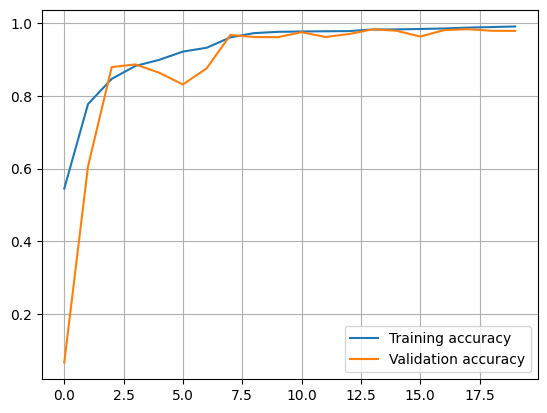

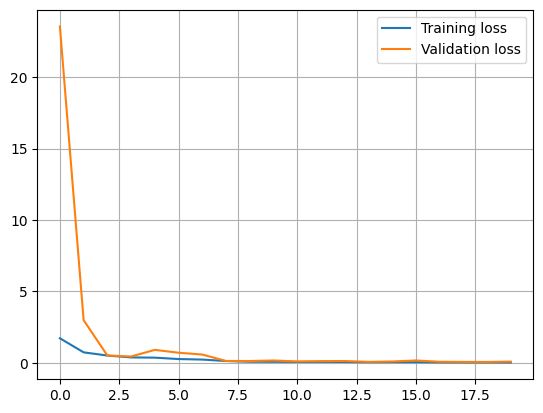

In [79]:
# Vẽ biểu đồ accuracy và loss
def plot_metric(history, metric):
    plt.plot(history.history[metric], label=f'Training {metric}')
    plt.plot(history.history[f'val_{metric}'], label=f'Validation {metric}')
    plt.legend()
    plt.grid()
    plt.show()

plot_metric(history, 'accuracy')
plot_metric(history, 'loss')

# Phần 11: Đánh nhãn toàn bộ hình ảnh và dự đoán

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


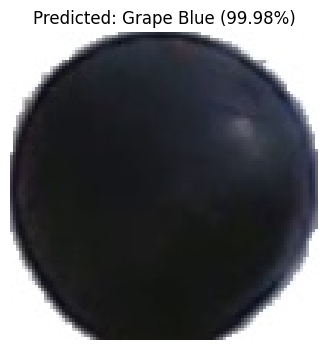

Dự đoán: Grape Blue với độ chính xác 99.98%


In [84]:
def predict_and_show(image_path):
    img = cv2.imread(image_path)  # Đọc ảnh
    img_resized = cv2.resize(img, (img_height, img_width))  # Resize ảnh về kích thước chuẩn
    img_normalized = np.expand_dims(img_resized, axis=0) / 255.0  # Chuẩn hóa ảnh giống tập train
    
    prediction = model.predict(img_normalized)  # Dự đoán nhãn
    confidence = np.max(prediction) * 100  # Lấy độ chính xác cao nhất
    label = list(train_data.class_indices.keys())[np.argmax(prediction)]  # Lấy nhãn dự đoán
    
    # Hiển thị hình ảnh cùng nhãn và độ chính xác
    plt.figure(figsize=(4, 4))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Chuyển ảnh sang RGB để hiển thị đúng màu
    plt.title(f'Predicted: {label} ({confidence:.2f}%)')
    plt.axis('off')
    plt.show()
    
    print(f'Dự đoán: {label} với độ chính xác {confidence:.2f}%')



# Kiểm tra lại đường dẫn trước khi chạy
sample_test_image = r'C:\Users\ADMIN\OneDrive\Desktop\Deep-Learning\Test_png\Grape Blue\19_100.png'  
predict_and_show(sample_test_image)
